# Download and Description of Financial Assets


### THEORETICAL CONCEPTS

In this course, we will assume that **stock prices behave as a random variable, whose distribution function is lognormal**. This choice is justified because prices cannot be negative and their behavior typically shows positive skewness. Moreover, since stock prices often experience large fluctuations over time, the use of a lognormal distribution allows us to capture this behavior more accurately. Consequently, we will assume that the logarithm of prices follows a normal distribution, which will be key for later analyses.

However, instead of working directly with prices, we will focus on returns. **The continuous returns of a stock, defined as $ r_t = \ln \left( \frac{P_t}{P_{t-1}} \right) $, approximate a normal distribution**. This provides us with a more convenient way to model and analyze the behavior of financial assets. **The normal distribution is characterized by two fundamental parameters: the mean, which represents the expected or most likely return of the stock, and the standard deviation, which measures the dispersion of returns around that mean, serving as a first approximation to the concept of risk**. The higher the standard deviation, the greater the risk associated with the asset.

This approach will allow us, throughout the course, to model and simulate different scenarios in which stock returns may vary based on these parameters, helping us better understand the balance between return and risk in financial markets.


### IMPLEMENTATION IN PYTHON

Pandas is a very popular library among Python developers, especially in the fields of Data Science and Machine Learning, as it offers powerful and flexible structures that make data manipulation and processing easier.

* You can find the Pandas documentation [here](https://pandas.pydata.org/docs/index.html)
* Specifically, you can check out some interesting tutorials [here](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html)


## 1. Data Reading


### From Excel and CSV

Let's suppose we have data from two **different sources**, one in **Excel** format and the other in **CSV** format. We want to read both files and merge them to have a single dataset.


<img src="../imgs/data_02 - Parte 1.png">

To use the library, you first need to install it:


- conda install -c anaconda pandas  as pd        ##### In case using anaconda

- pip install pandas as pd

#### Excel Format

In [83]:
import pandas as pd

file_path = 'https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/data_02%20-%20Parte%201.xlsx'

data1 = pd.read_excel(file_path)
data1

,Date,AAPL.O,MSFT.O
0,2010-01-01,NaN,NaN
1,2010-01-04,30.572827,30.950
2,2010-01-05,30.625684,30.960
3,2010-01-06,30.138541,30.770
4,2010-01-07,30.082827,30.452
...,...,...,...
2211,2018-06-25,182.170000,98.390
2212,2018-06-26,184.430000,99.080
2213,2018-06-27,184.160000,97.540
2214,2018-06-28,185.500000,98.630


The structures used in Pandas are:
* **DataFrame**: a two-dimensional matrix made up of series concatenated in rows and columns. Each column is a series.
* **Series**: a column vector or one-dimensional matrix that can store all types of data with an index.

<center>
<img src="../imgs/series+pandas.png"  alt="drawing" width="40%"/>
</center>



In our case, the information has been stored in the dataframe called `data1`, while `Date`, `AAPL.O`, and `MSFTO.O` are series.

<img src="../imgs/Estructura_Pandas.png">


Once loaded, the first step is to view the general information of the dataframe:

In [84]:
# Tamaño del DataFrame (filas, columnas)
data1.shape

(2216, 3)

In [85]:
print(f'Number of Rows: {data1.shape[0]}')
print(f'Number of Columns: {data1.shape[1]}')

Number of Rows: 2216
Number of Columns: 3


In [86]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2216 non-null   datetime64[ns]
 1   AAPL.O  2138 non-null   float64       
 2   MSFT.O  2138 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 52.1 KB


Now we will be more specific when instructing Pandas how to read the Excel file. We will specify from which sheet we want to read the data and which column we want to act as the index of the data `index_col="Date"`.


In [87]:
data1 = pd.read_excel(file_path, sheet_name="Datos", index_col="Date")
data1

,AAPL.O,MSFT.O
Date,,
2010-01-01,NaN,NaN
2010-01-04,30.572827,30.950
2010-01-05,30.625684,30.960
2010-01-06,30.138541,30.770
2010-01-07,30.082827,30.452
...,...,...
2018-06-25,182.170000,98.390
2018-06-26,184.430000,99.080
2018-06-27,184.160000,97.540


It can be observed that, in this case, the index is already a date (DatetimeIndex format).

In [88]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
dtypes: float64(2)
memory usage: 51.9 KB


We can determine the type of an object using the `type` method.


In [89]:
type(data1)

pandas.core.frame.DataFrame

We can check the index of a DataFrame by accessing its `index` property.


In [90]:
data1.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2216, freq=None)

#### CSV Format

Read the file 'data_02 - Parte 2.csv' and store it in a variable called `data2`.


In [91]:
file_path_2 = 'https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/data_02%20-%20Parte%202.csv'

data2 = pd.read_csv(file_path_2, index_col="Date")
data2

,SPY,GLD
Date,,
2010-01-01,NaN,NaN
2010-01-04,113.33,109.80
2010-01-05,113.63,109.70
2010-01-06,113.71,111.51
2010-01-07,114.19,110.82
...,...,...
2018-06-25,271.00,119.89
2018-06-26,271.60,119.26
2018-06-27,269.35,118.58


Now we have the data in two separate dataframes: `data1` and `data2`. To merge them into a single dataframe, we use **pd.concat()**.

Let's see how it works with some examples:


#### EXAMPLE 1:

<div style="display: flex; align-items: center;">
    <!-- Asignar un ancho fijo a la imagen -->
    <div style="width: 35%;">
        <img src="../imgs/merging_concat_basic.png" alt="drawing" style="width: 100%;"/>
    </div>
    <!-- El texto ocupará el resto del espacio -->
<div style="flex-grow: 1; padding-left: 10px;">
    <strong>What does `pd.concat()` do?</strong>
    <ul>
        <li><strong>Same columns, different rows:</strong> `pd.concat()` merges DataFrames with the same columns but different rows.</li>
        <li><strong>Result:</strong> Returns a DataFrame that contains all the rows and columns from the original DataFrames.</li>
    </ul>
</div>

</div>

<div style="background-color: #e0f7fa; padding: 10px;">

You have two DataFrames containing adjusted closing prices for Apple (AAPL) and Microsoft (MSFT) stocks over different time periods. The indices of both DataFrames are of type DatetimeIndex, and the dates do not overlap: the first DataFrame contains data up to a certain date, and the second starts immediately after the first one ended.

You are asked to concatenate these DataFrames to form a single DataFrame containing the prices for both time periods.


In [92]:
# Creación del primer DataFrame con datos hasta el 2023-01-05
dates1 = pd.date_range(start="2023-01-01", end="2023-01-05", freq="D") # Rango de fechas diarias para el índice
dicc1 = {
    'AAPL': [150.75, 152.30, 153.40, 154.60, 155.10],
    'MSFT': [250.30, 252.40, 253.10, 254.80, 255.55]
}
df1 = pd.DataFrame(dicc1, index=dates1)

# Creación del segundo DataFrame con datos a partir del 2023-01-06
dates2 = pd.date_range(start="2023-01-06", end="2023-01-10", freq="D")
dicc2 = {
    'AAPL': [156.20, 157.30, 158.10, 159.00, 160.10],
    'MSFT': [256.50, 257.60, 258.10, 259.40, 260.50]
}
df2 = pd.DataFrame(dicc2, index=dates2)

<div style="background-color: #e0f7fa; padding: 10px;">

Merge the dataframes into a single dataframe called `df_concatenated` using the `concat` command.


In [93]:
# Concatenación de los DataFrames
df_concatenated = pd.concat([df1, df2])

In [94]:
# Mostrar los DataFrames y el resultado final
print("DataFrame 1:\n", df1)
print("\nDataFrame 2:\n", df2)
print("\nDataFrame concatenado:\n", df_concatenated)

DataFrame 1:
               AAPL    MSFT
2023-01-01  150.75  250.30
2023-01-02  152.30  252.40
2023-01-03  153.40  253.10
2023-01-04  154.60  254.80
2023-01-05  155.10  255.55

DataFrame 2:
              AAPL   MSFT
2023-01-06  156.2  256.5
2023-01-07  157.3  257.6
2023-01-08  158.1  258.1
2023-01-09  159.0  259.4
2023-01-10  160.1  260.5

DataFrame concatenado:
               AAPL    MSFT
2023-01-01  150.75  250.30
2023-01-02  152.30  252.40
2023-01-03  153.40  253.10
2023-01-04  154.60  254.80
2023-01-05  155.10  255.55
2023-01-06  156.20  256.50
2023-01-07  157.30  257.60
2023-01-08  158.10  258.10
2023-01-09  159.00  259.40
2023-01-10  160.10  260.50


#### EXAMPLE 2:

<center>
<img src="../imgs/merging_concat_axis1.png"  alt="drawing" width="40%"/>
</center>

<strong>What does `pd.concat()` do when DataFrames have common and non-common columns and rows?</strong>
<ul>
    <li><strong>Common and non-common columns and rows:</strong> The DataFrames being merged may have some columns and rows in common, while others do not match.</li>
    <li><strong>Result:</strong> `pd.concat()` creates a new DataFrame that includes all columns and rows from both DataFrames. When a column or row matches between the DataFrames, the available data is combined. If a column or row lacks data in one of the DataFrames, `NaN` is filled in those positions.</li>
</ul>


In [95]:
# Crear DataFrame 1 con precios de dos activos (AAPL y MSFT)
dicc1 = {
    'Fecha': ['2024-09-10', '2024-09-11', '2024-09-12'],
    'AAPL': [150, 152, 153],
    'MSFT': [300, 305, 310]
}
df1 = pd.DataFrame(dicc1)
df1 = df1.set_index('Fecha')


# Crear DataFrame 2 con precios de dos activos (MSFT y CSCO)
dicc2 = {
    'Fecha': ['2024-09-11', '2024-09-12', '2024-09-13'],
    'MSFT': [306, 311, 315],
    'CSCO': [50, 51, 52]
}
df2 = pd.DataFrame(dicc2)
df2 = df2.set_index('Fecha')




<div style="background-color: #e0f7fa; padding: 10px;">

Merge the dataframes into a single dataframe called `df_concatenated` using the `concat` command.


In [96]:
# Combinar los DataFrames usando pd.concat
df_concatenado = pd.concat([df1, df2] , axis=0)

# Mostrar los DataFrames y el resultado final
print("DataFrame 1:\n", df1)
print("\nDataFrame 2:\n", df2)
print("\nDataFrame concatenado:\n", df_concatenado)

DataFrame 1:
             AAPL  MSFT
Fecha                 
2024-09-10   150   300
2024-09-11   152   305
2024-09-12   153   310

DataFrame 2:
             MSFT  CSCO
Fecha                 
2024-09-11   306    50
2024-09-12   311    51
2024-09-13   315    52

DataFrame concatenado:
              AAPL  MSFT  CSCO
Fecha                        
2024-09-10  150.0   300   NaN
2024-09-11  152.0   305   NaN
2024-09-12  153.0   310   NaN
2024-09-11    NaN   306  50.0
2024-09-12    NaN   311  51.0
2024-09-13    NaN   315  52.0


<div style="background-color: #e0f7fa; padding: 10px;">

Test what happens if you add `ignore_index=True` to the command.


In [97]:
# Combinar los DataFrames usando pd.concat
df_concatenado = pd.concat([df1, df2] , axis=0, ignore_index=True)

# Mostrar los DataFrames y el resultado final
print("DataFrame 1:\n", df1)
print("\nDataFrame 2:\n", df2)
print("\nDataFrame concatenado:\n", df_concatenado)


DataFrame 1:
             AAPL  MSFT
Fecha                 
2024-09-10   150   300
2024-09-11   152   305
2024-09-12   153   310

DataFrame 2:
             MSFT  CSCO
Fecha                 
2024-09-11   306    50
2024-09-12   311    51
2024-09-13   315    52

DataFrame concatenado:
     AAPL  MSFT  CSCO
0  150.0   300   NaN
1  152.0   305   NaN
2  153.0   310   NaN
3    NaN   306  50.0
4    NaN   311  51.0
5    NaN   315  52.0


#### EXAMPLE 3:

<center>
<img src="../imgs/merging_concat_axis1_inner.png"  alt="drawing" width="40%"/>
</center>

<strong>What does `pd.concat()` do with `join="inner"` and `axis=1`?</strong>
<ul>
    <li><strong>Common rows:</strong> Only the rows that exist in both DataFrames are kept.</li>
    <li><strong>Result:</strong> The final DataFrame includes only the columns and rows where data exists in both DataFrames.</li>
</ul>


<div style="background-color: #e0f7fa; padding: 10px;">

Merge the dataframes into a single dataframe called `df_concatenated` using the `concat` command with the options `axis=1` and `join='inner'`.


In [98]:
df_concatenado_inner = pd.concat([df1, df2], axis=1, join="inner")

print(df_concatenado_inner)

            AAPL  MSFT  MSFT  CSCO
Fecha                             
2024-09-11   152   305   306    50
2024-09-12   153   310   311    51


<div style="background-color: #e0f7fa; padding: 10px;">

Test what happens if you remove `axis=1` from the command.


**IN OUR CASE** The following instruction will not work as expected, or rather, *differently from what was anticipated*. What happened? Why did the `concat` function behave this way?


In [99]:
data1

,AAPL.O,MSFT.O
Date,,
2010-01-01,NaN,NaN
2010-01-04,30.572827,30.950
2010-01-05,30.625684,30.960
2010-01-06,30.138541,30.770
2010-01-07,30.082827,30.452
...,...,...
2018-06-25,182.170000,98.390
2018-06-26,184.430000,99.080
2018-06-27,184.160000,97.540


In [100]:
data = pd.concat([data1, data2], axis=0)
data

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-01 00:00:00,NaN,NaN,NaN,NaN
2010-01-04 00:00:00,30.572827,30.950,NaN,NaN
2010-01-05 00:00:00,30.625684,30.960,NaN,NaN
2010-01-06 00:00:00,30.138541,30.770,NaN,NaN
2010-01-07 00:00:00,30.082827,30.452,NaN,NaN
...,...,...,...,...
2018-06-25,NaN,NaN,271.00,119.89
2018-06-26,NaN,NaN,271.60,119.26
2018-06-27,NaN,NaN,269.35,118.58


In [101]:
data1.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2216, freq=None)

In [102]:
data2.index

Index(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21', '2018-06-22',
       '2018-06-25', '2018-06-26', '2018-06-27', '2018-06-28', '2018-06-29'],
      dtype='object', name='Date', length=2216)

If we now specify not only which column we want as the index but also that Pandas should automatically convert strings that look like dates into a date type...

In [103]:
# data2 = pd.read_csv("../data/data_02 - Parte 2.csv", index_col="Date", parse_dates=["Date"])
data2 = pd.read_csv(file_path_2, index_col="Date", parse_dates=True)
data2

,SPY,GLD
Date,,
2010-01-01,NaN,NaN
2010-01-04,113.33,109.80
2010-01-05,113.63,109.70
2010-01-06,113.71,111.51
2010-01-07,114.19,110.82
...,...,...
2018-06-25,271.00,119.89
2018-06-26,271.60,119.26
2018-06-27,269.35,118.58


In [104]:
data2.index

DatetimeIndex(['2010-01-01', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-25', '2018-06-26', '2018-06-27',
               '2018-06-28', '2018-06-29'],
              dtype='datetime64[ns]', name='Date', length=2216, freq=None)

And now we merge the two DataFrames by columns.

In [105]:
data = pd.concat([data1, data2], axis=1, join="inner", ignore_index=False)
data

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-01,NaN,NaN,NaN,NaN
2010-01-04,30.572827,30.950,113.33,109.80
2010-01-05,30.625684,30.960,113.63,109.70
2010-01-06,30.138541,30.770,113.71,111.51
2010-01-07,30.082827,30.452,114.19,110.82
...,...,...,...,...
2018-06-25,182.170000,98.390,271.00,119.89
2018-06-26,184.430000,99.080,271.60,119.26
2018-06-27,184.160000,97.540,269.35,118.58


## 2. Slicing

*Slicing* is the technique we use to select and filter data from a *DataFrame* or *Series*.

In [106]:
# Consultamos las columnas que tiene nuestro DataFrame.
data.columns

Index(['AAPL.O', 'MSFT.O', 'SPY', 'GLD'], dtype='object')

In [107]:
# Seleccionamos la serie de datos que tiene por nombre de columna "AAPL.O".
data["AAPL.O"] # Serie de datos

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [108]:
data[["AAPL.O"]]  # DataFrame

,AAPL.O
Date,
2010-01-01,NaN
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
...,...
2018-06-25,182.170000
2018-06-26,184.430000
2018-06-27,184.160000


In [109]:
# Seleccionamos la serie de datos que tiene por nombre de columna "AAPL.O" y luego seleccionamos el valor que tiene en la fecha "2010-01-06".
data["AAPL.O"]["2010-01-06"]

np.float64(30.13854129)

To extract information from a ``DataFrame``, we will frequently use the functions ``loc`` and ``iloc``:
* ``loc``: allows us to perform slicing using the index and/or column values.
* ``iloc``: allows us to perform slicing using the positions in the index and/or columns.


In [110]:
# Selecciona todas las filas y solo la columna "AAPL.O".
data.loc[:, "AAPL.O"]

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [111]:
# Selecciona todas las filas y solo la columna en la posición 0.
data.iloc[:, 0]

Date
2010-01-01           NaN
2010-01-04     30.572827
2010-01-05     30.625684
2010-01-06     30.138541
2010-01-07     30.082827
                 ...    
2018-06-25    182.170000
2018-06-26    184.430000
2018-06-27    184.160000
2018-06-28    185.500000
2018-06-29    185.110000
Name: AAPL.O, Length: 2216, dtype: float64

In [112]:
# Selecciona la fila con fecha "2018-06-25" y las columnas "AAPL.O" y "MSFT.O".
data.loc["2018-06-25", ["AAPL.O", "MSFT.O"]]

AAPL.O    182.17
MSFT.O     98.39
Name: 2018-06-25 00:00:00, dtype: float64

In [113]:
# Selecciona las filas con fechas entre "2018-05" y "2018-06-10" y las columnas "AAPL.O" y "MSFT.O".
data.loc["2018-05":"2018-06-10", ["AAPL.O", "MSFT.O"]]

,AAPL.O,MSFT.O
Date,,
2018-05-01,169.10,95.00
2018-05-02,176.57,93.51
2018-05-03,176.89,94.07
2018-05-04,183.83,95.16
2018-05-07,185.16,96.22
2018-05-08,186.05,95.81
2018-05-09,187.36,96.94
2018-05-10,190.04,97.91
2018-05-11,188.59,97.70


In [114]:
# Selecciona las 5 primeras filas.
data.iloc[:5]

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2010-01-01,NaN,NaN,NaN,NaN
2010-01-04,30.572827,30.950,113.33,109.80
2010-01-05,30.625684,30.960,113.63,109.70
2010-01-06,30.138541,30.770,113.71,111.51
2010-01-07,30.082827,30.452,114.19,110.82


<div style="background-color: #e0f7fa; padding: 10px;">

Select the first 10 days of 2018 using `.loc` and `.iloc`.

</div>

In [115]:
data.loc["2018"].iloc[:10, :]

,AAPL.O,MSFT.O,SPY,GLD
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,172.26,85.95,268.77,125.15
2018-01-03,172.23,86.35,270.47,124.82
2018-01-04,173.03,87.11,271.61,125.46
2018-01-05,175.00,88.19,273.42,125.33
2018-01-08,174.35,88.28,273.92,125.31
2018-01-09,174.33,88.22,274.54,124.73
2018-01-10,174.29,87.82,274.12,125.03
2018-01-11,175.28,88.08,276.12,125.44


## 3. Data Inspection

In [116]:
file_path_3 = "https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/data_01.csv"

data = pd.read_csv(file_path_3, index_col="Date", parse_dates=True)
data

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN
...,...,...,...,...
2024-06-24,NaN,215.630005,447.670013,NaN
2024-06-25,NaN,214.559998,450.950012,NaN
2024-06-26,NaN,212.580002,452.160004,NaN


Retrieve information about the data contained in the DataFrame using ``info`` and ``describe``.
* ``info``: provides information about the types and range of index values, as well as the type and null values of the columns.
* ``describe``: provides basic statistical information for the numerical columns.


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-07-01 to 2024-06-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1212 non-null   float64
 1   GLD     1198 non-null   float64
 2   MSFT    1216 non-null   float64
 3   SPY     1079 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


In [118]:
data.describe()

,AAPL,GLD,MSFT,SPY
count,1212.000000,1198.000000,1216.000000,1079.000000
mean,134.902860,171.328430,262.279147,380.759461
std,41.409409,17.497325,80.092659,58.007944
min,46.647964,133.210007,126.088112,209.257523
25%,113.291052,162.355003,206.069595,342.927185
50%,143.507835,170.485001,255.302002,393.155823
75%,169.450161,180.647495,318.535294,425.431168
max,214.240005,224.559998,452.850006,498.040863


Examine Null Data


<Axes: >

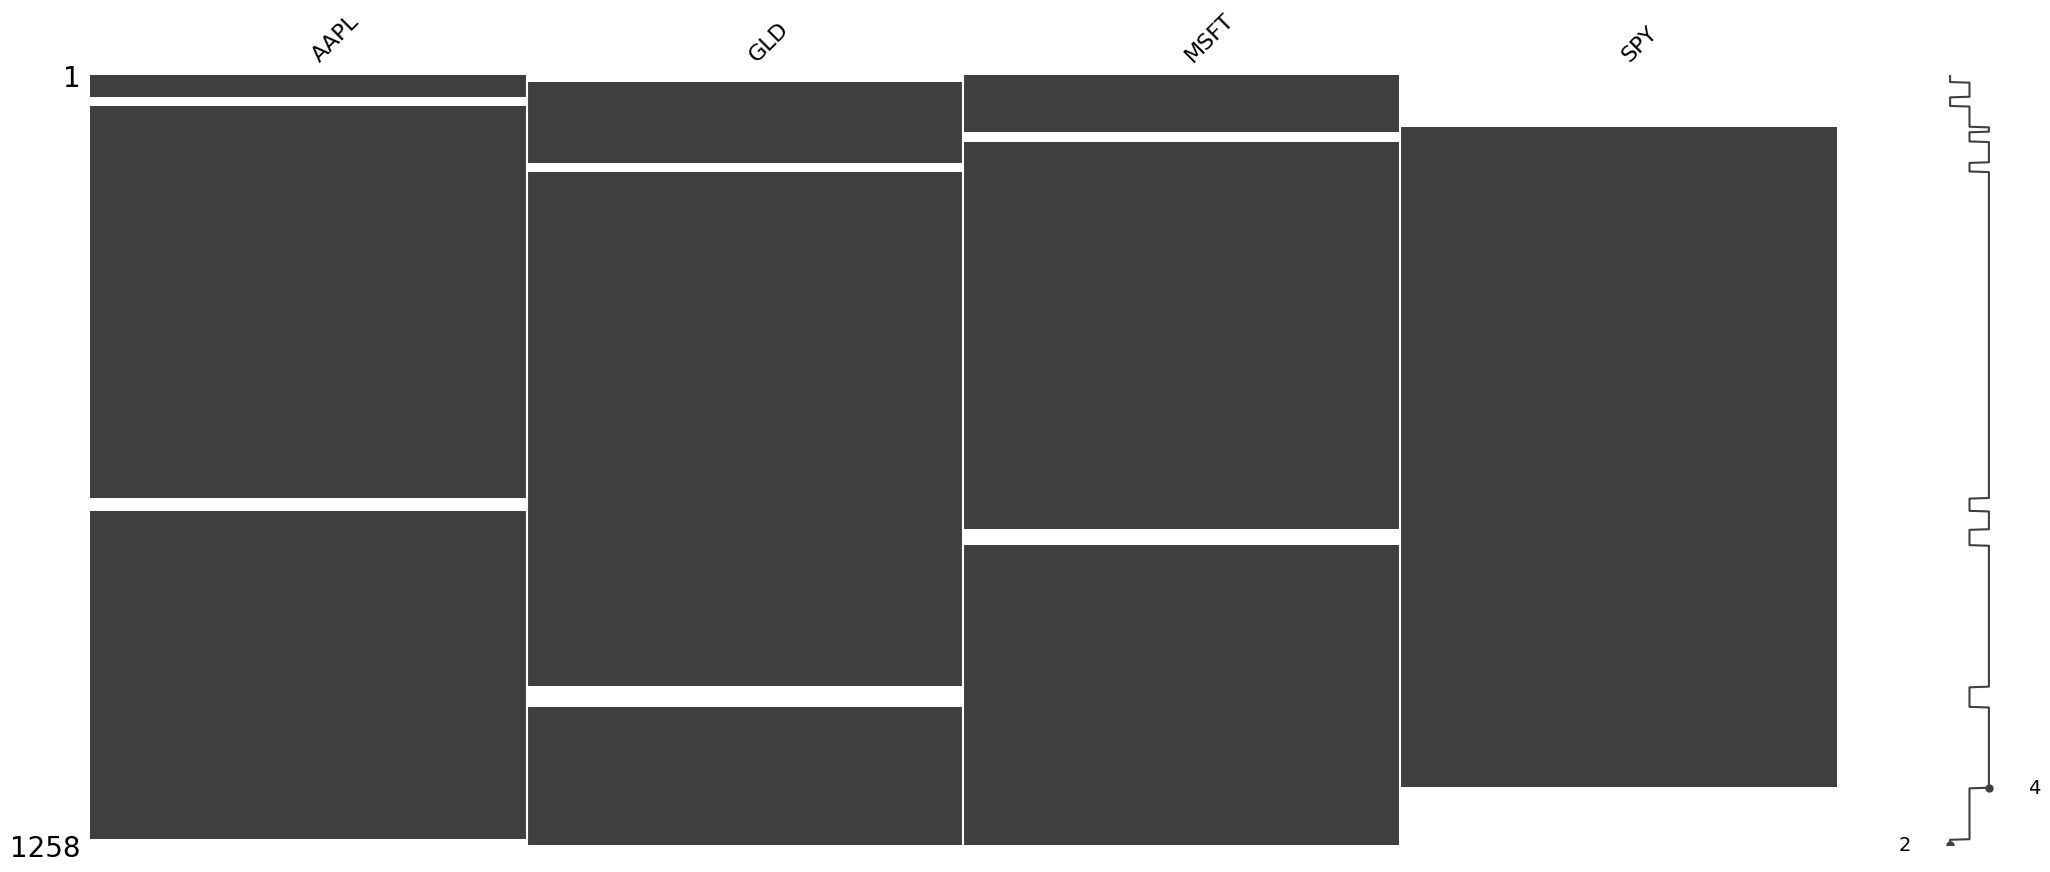

In [119]:
import missingno as mso

mso.matrix(data)

In [120]:
# Contamos el número de nulos en cada columna.
data.isnull().sum()

AAPL     46
GLD      60
MSFT     42
SPY     179
dtype: int64

<div style="background-color: #e0f7fa; padding: 10px;">

## EXERCISE: Initial Analysis of Financial Asset Price Series:

1- **Data Download**:

    Download the historical price files of three different financial assets (AAPL.xlsx, MSFT.xlsx, and CSCO.csv).

2- **Data Concatenation**:

    Select only the Adjusted Close column from each DataFrame, renaming them to represent the ticker of each asset (AAPL, MSFT, and CSCO).

    Merge all into a single DataFrame.

3- **Initial Inspection**:

    Display the first 10 rows of the resulting DataFrame to review the structure and content of the data.

    Identify the columns that contain null values and show the total number of null values per column.

4- **Data Slicing**:

    Perform slicing to select only the rows corresponding to the year 2024.

    Create a new table containing the closing price data of the selected assets for the first 60 observations of 2024.

5- **Basic Exploratory Analysis**:

    Calculate the number of days for which closing prices were available for each asset in 2024.

    Calculate the mean of the closing prices for each asset during the year 2024, ignoring null values.

6- **Data Export**:

    Save the final DataFrame to a new CSV file called precios_consolidados_2024.csv.
</div>


1- **Data Download**:

    Download the historical price files of three different financial assets (AAPL.xlsx, MSFT.xlsx, and CSCO.csv).

In [121]:
# 1. Cargar los datos desde los archivos en el directorio '../data' y establecer la columna 'Date' como índice

aapl_path = "https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/AAPL.xlsx"
msft_path = "https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/MSFT.xlsx"
csco_path = "https://github.com/alfonso-santos/finanzas-tecnologia-practicas/raw/main/data/CSCO.csv"

df_aapl = pd.read_excel(aapl_path, index_col='Date', parse_dates=True)
df_msft = pd.read_excel(msft_path, index_col='Date', parse_dates=True)
df_csco = pd.read_csv(csco_path, index_col='Date', parse_dates=True)

2- **Data Concatenation**:

    Select only the Adjusted Close column from each DataFrame, renaming them to represent the ticker of each asset (AAPL, MSFT, and CSCO).

    Merge all into a single DataFrame.

In [122]:
# 2. Seleccionar solo la columna 'Adj Close' de cada DataFrame y renombrarla con el nombre de la empresa correspondiente
df_aapl = df_aapl[['Adj Close']]
df_aapl = df_aapl.rename(columns={'Adj Close': 'AAPL'})

df_msft = df_msft[['Adj Close']]
df_msft = df_msft.rename(columns={'Adj Close': 'MSFT'})

df_csco = df_csco[['Adj Close']]
df_csco = df_csco.rename(columns={'Adj Close': 'CSCO'})


In [123]:
# Concatenar los DataFrames a lo largo de las columnas
df_concatenado = pd.concat([df_aapl, df_msft, df_csco], axis=1)

df_concatenado

,AAPL,MSFT,CSCO
Date,,,
2022-01-03,179.273590,NaN,NaN
2022-01-04,176.998337,NaN,NaN
2022-01-05,172.290207,NaN,NaN
2022-01-06,169.414108,NaN,NaN
2022-01-07,169.581543,NaN,NaN
...,...,...,...
2024-09-09,220.910004,405.720001,NaN
2024-09-10,220.110001,414.200012,NaN
2024-09-11,222.660004,423.040009,NaN


3- **Initial Inspection**:

    Display the first 10 rows of the resulting DataFrame to review the structure and content of the data.

    Identify the columns that contain null values and show the total number of null values per column.

In [124]:
# Verificar la concatenación
df_concatenado.head(10)

,AAPL,MSFT,CSCO
Date,,,
2022-01-03,179.273590,NaN,NaN
2022-01-04,176.998337,NaN,NaN
2022-01-05,172.290207,NaN,NaN
2022-01-06,169.414108,NaN,NaN
2022-01-07,169.581543,NaN,NaN
2022-01-10,169.601257,NaN,NaN
2022-01-11,172.447815,NaN,NaN
2022-01-12,172.891037,NaN,NaN
2022-01-13,169.601257,NaN,NaN


In [125]:
df_concatenado.isnull().sum()

AAPL      0
MSFT    251
CSCO    156
dtype: int64

In [126]:
df_concatenado.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 678 entries, 2022-01-03 to 2024-09-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    678 non-null    float64
 1   MSFT    427 non-null    float64
 2   CSCO    522 non-null    float64
dtypes: float64(3)
memory usage: 21.2 KB


4- **Data Slicing**:

    Perform slicing to select only the rows corresponding to the year 2024.

    Create a new table containing the closing price data of the selected assets for the first 60 observations of 2024.

In [127]:
# Selecciono los datos de 2024

df_2024 = df_concatenado.loc['2024']

In [128]:
# Selecciono los datos de 2024 y los primeros 60 días

df_60 = df_concatenado.loc['2024'].iloc[0:60, :]

5- **Basic Exploratory Analysis**:

    Calculate the number of days for which closing prices were available for each asset in 2024.

    Calculate the mean of the closing prices for each asset during the year 2024, ignoring null values.

In [129]:
df_2024.info() # Número de días con valores de cierre

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 177 entries, 2024-01-02 to 2024-09-13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    177 non-null    float64
 1   MSFT    177 non-null    float64
 2   CSCO    124 non-null    float64
dtypes: float64(3)
memory usage: 5.5 KB


In [130]:
df_2024.mean(skipna=True) # Valor promedio de cierre sin tener en cuenta los valores nulos

AAPL    195.430356
MSFT    416.357165
CSCO     48.046718
dtype: float64

In [131]:
df_2024.describe()

,AAPL,MSFT,CSCO
count,177.000000,177.000000,124.000000
mean,195.430356,416.357165,48.046718
std,21.081554,19.556515,1.465662
min,164.585999,365.751038,45.133335
25%,180.296478,405.097839,47.024632
50%,189.620514,414.005676,48.065247
75%,217.708008,424.746948,49.156325
max,234.548523,466.718781,51.465023


6- **Data Export**:

    Save the final DataFrame to a new CSV file called precios_consolidados_2024.csv.

In [132]:
df_2024.to_csv('data_2024.csv')

## 4. Data Cleaning

What can we do now?
* Remove rows that do not contain data.
* Fill in the missing data.
* Resample the data to a lower frequency.
* Retrieve the data from a more reliable source.


Remove rows that do not contain data


In [133]:
# Eliminamos las columnas que tengan al menos un valor nulo.
data.dropna(how="any", axis=1)

""
Date
2019-07-01
2019-07-02
2019-07-03
2019-07-05
2019-07-08
...
2024-06-24
2024-06-25
2024-06-26


<Axes: >

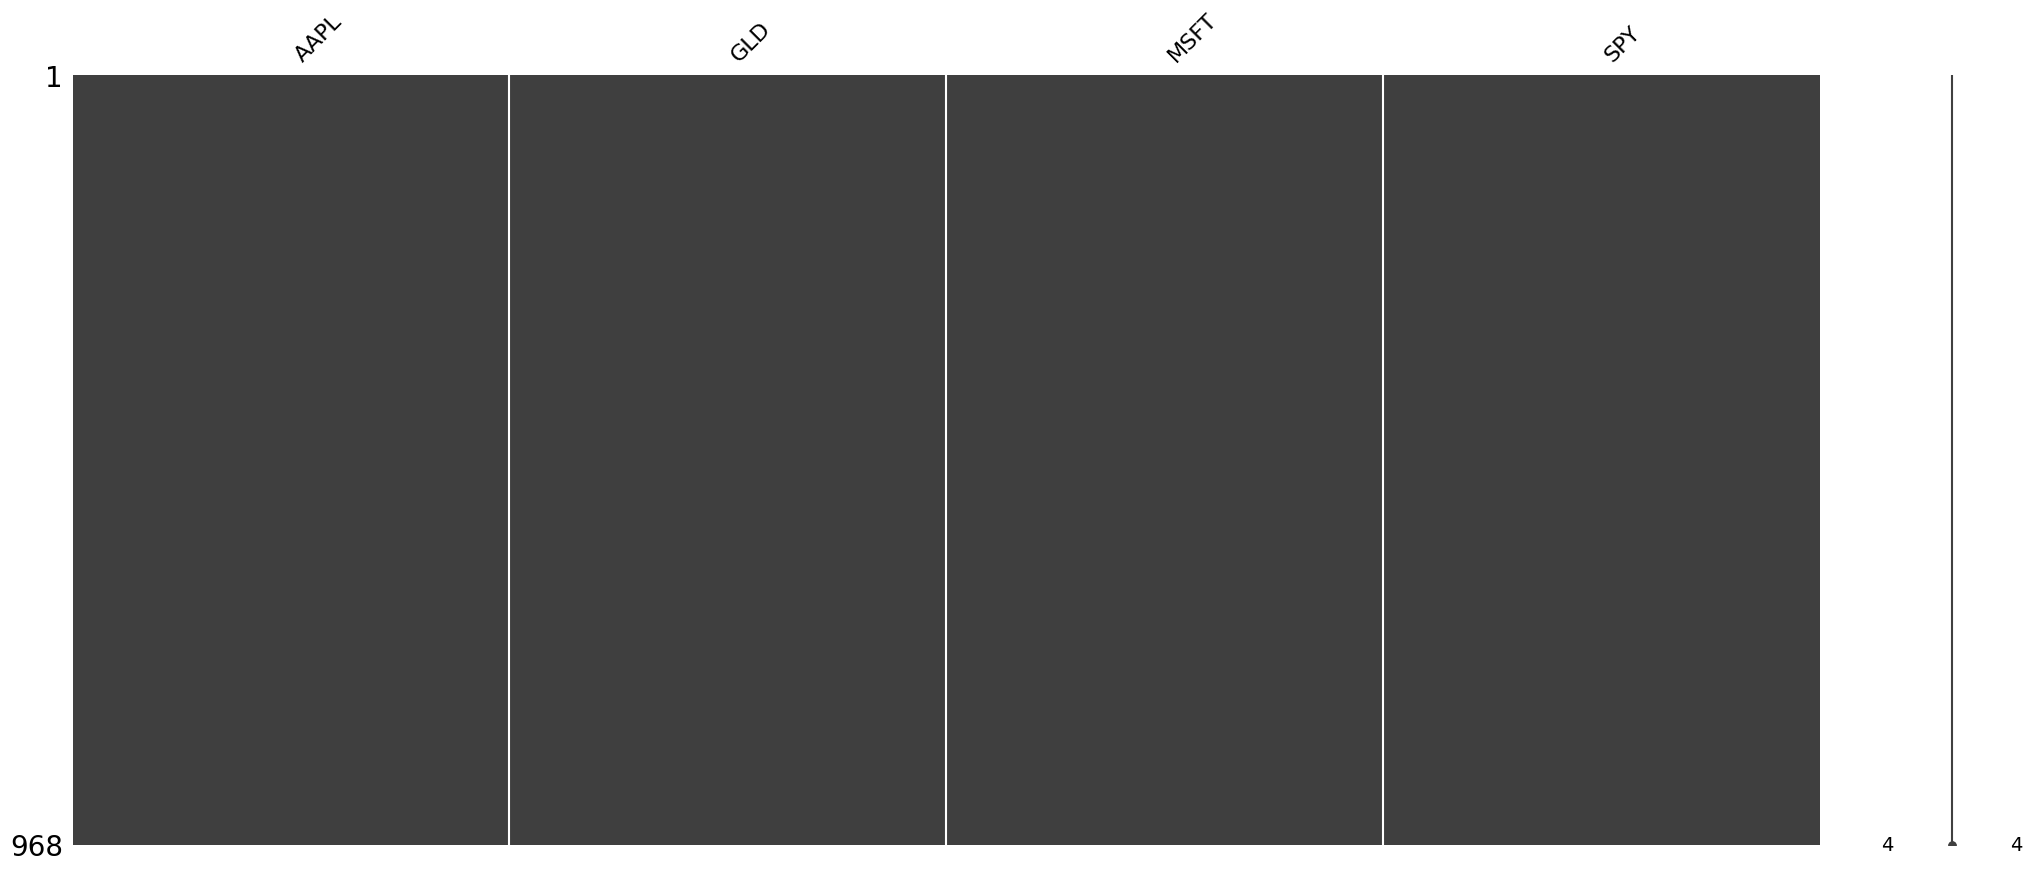

In [134]:
# Eliminamos las filas que tengan al menos un valor nulo.
mso.matrix(data.dropna(how="any", axis=0))

Fill in missing data.

**Be careful when filling data... it depends on the specific use case you're working on.**


In [135]:
data

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN
...,...,...,...,...
2024-06-24,NaN,215.630005,447.670013,NaN
2024-06-25,NaN,214.559998,450.950012,NaN
2024-06-26,NaN,212.580002,452.160004,NaN


In [136]:
# Rellena los NaN de cada columna con un cero.
data.fillna(0)

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,0.000000,129.397415,0.0
2019-07-02,48.913532,0.000000,130.255753,0.0
2019-07-03,49.318890,0.000000,131.095001,0.0
2019-07-05,49.275448,0.000000,130.713547,0.0
2019-07-08,48.259693,0.000000,130.618149,0.0
...,...,...,...,...
2024-06-24,0.000000,215.630005,447.670013,0.0
2024-06-25,0.000000,214.559998,450.950012,0.0
2024-06-26,0.000000,212.580002,452.160004,0.0


In [137]:
# Rellena los NaN de cada columna con la media de cada columna.
data.fillna(data.mean())


,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,171.328430,129.397415,380.759461
2019-07-02,48.913532,171.328430,130.255753,380.759461
2019-07-03,49.318890,171.328430,131.095001,380.759461
2019-07-05,49.275448,171.328430,130.713547,380.759461
2019-07-08,48.259693,171.328430,130.618149,380.759461
...,...,...,...,...
2024-06-24,134.902860,215.630005,447.670013,380.759461
2024-06-25,134.902860,214.559998,450.950012,380.759461
2024-06-26,134.902860,212.580002,452.160004,380.759461


In [138]:
# Rellena los NaN de cada columna con el último valor conocido hacia adelante.
data.ffill()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,NaN,129.397415,NaN
2019-07-02,48.913532,NaN,130.255753,NaN
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-05,49.275448,NaN,130.713547,NaN
2019-07-08,48.259693,NaN,130.618149,NaN
...,...,...,...,...
2024-06-24,214.240005,215.630005,447.670013,490.965698
2024-06-25,214.240005,214.559998,450.950012,490.965698
2024-06-26,214.240005,212.580002,452.160004,490.965698


In [139]:
# Rellena los NaN de cada columna con el último valor conocido hacia atrás.
data.bfill()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,136.479996,129.397415,282.404022
2019-07-02,48.913532,136.479996,130.255753,282.404022
2019-07-03,49.318890,136.479996,131.095001,282.404022
2019-07-05,49.275448,136.479996,130.713547,282.404022
2019-07-08,48.259693,136.479996,130.618149,282.404022
...,...,...,...,...
2024-06-24,NaN,215.630005,447.670013,NaN
2024-06-25,NaN,214.559998,450.950012,NaN
2024-06-26,NaN,212.580002,452.160004,NaN


In [140]:
# Rellena los NaN de cada columna con el último valor conocido primero hacia delante y luego hacia atrás.
data.ffill().bfill()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-01,48.628834,136.479996,129.397415,282.404022
2019-07-02,48.913532,136.479996,130.255753,282.404022
2019-07-03,49.318890,136.479996,131.095001,282.404022
2019-07-05,49.275448,136.479996,130.713547,282.404022
2019-07-08,48.259693,136.479996,130.618149,282.404022
...,...,...,...,...
2024-06-24,214.240005,215.630005,447.670013,490.965698
2024-06-25,214.240005,214.559998,450.950012,490.965698
2024-06-26,214.240005,212.580002,452.160004,490.965698


Resample the data to a lower frequency.

In [141]:
# Remuestrea los datos usando el último valor conocido el miércoles de cada semana.
data.resample("W-WED").last()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-03,49.318890,NaN,131.095001,NaN
2019-07-10,49.034176,NaN,131.466949,NaN
2019-07-17,49.063133,NaN,129.960129,NaN
2019-07-24,50.346706,134.369995,134.204056,NaN
2019-07-31,51.401085,133.210007,129.960129,NaN
...,...,...,...,...
2024-06-05,195.869995,217.820007,424.010010,NaN
2024-06-12,213.070007,214.720001,441.059998,NaN
2024-06-19,214.240005,215.470001,446.339996,NaN


In [142]:
# Remuestrea los datos usando el último valor conocido en la fecha de fin de mes.
data.resample("ME").last()

,AAPL,GLD,MSFT,SPY
Date,,,,
2019-07-31,51.401085,133.210007,129.960129,NaN
2019-08-31,50.947308,143.750000,131.914291,NaN
2019-09-30,54.243515,138.869995,133.033829,NaN
2019-10-31,60.247440,142.429993,137.186630,281.651917
2019-11-30,64.919876,137.860001,139.664993,291.847198
2019-12-31,71.332909,142.899994,151.412109,300.326996
2020-01-31,75.185577,147.119995,163.442474,300.205719
2020-02-29,66.561684,148.380005,155.975128,276.439667
2020-03-31,61.918247,148.050003,151.835297,241.920288


Retrieve the data from another source


**The YahooFinance API** allows programmatic access to financial data, including historical prices, real-time quotes, fundamental data, and market news.

For more information on the data it provides, you can check [YahooFinance Data](https://python-yahoofinance.readthedocs.io/en/latest/)


In [143]:
import yfinance as yf

data = yf.download(["AAPL", "GLD", "MSFT", "SPY"], start="2018-12-31", end="2023-12-31")
data = data.loc[:, "Adj Close"]

[*********************100%***********************]  4 of 4 completed


In [144]:
data

Ticker,AAPL,GLD,MSFT,SPY
Date,,,,
2018-12-31 00:00:00+00:00,37.707054,121.250000,95.926308,228.166260
2019-01-02 00:00:00+00:00,37.750072,121.330002,95.501350,228.403641
2019-01-03 00:00:00+00:00,33.989899,122.430000,91.988014,222.953247
2019-01-04 00:00:00+00:00,35.440910,121.440002,96.266312,230.421265
2019-01-07 00:00:00+00:00,35.362019,121.860001,96.389091,232.238098
...,...,...,...,...
2023-12-22 00:00:00+00:00,192.868134,190.270004,372.543945,469.225250
2023-12-26 00:00:00+00:00,192.320221,191.720001,372.623505,471.206573
2023-12-27 00:00:00+00:00,192.419830,192.589996,372.036713,472.058533


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-12-31 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1259 non-null   float64
 1   GLD     1259 non-null   float64
 2   MSFT    1259 non-null   float64
 3   SPY     1259 non-null   float64
dtypes: float64(4)
memory usage: 49.2 KB


In [146]:
data.describe()

Ticker,AAPL,GLD,MSFT,SPY
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,121.042940,162.905488,230.404781,357.753563
std,46.682020,18.664851,73.128126,66.677770
min,33.989899,119.940002,91.988014,208.617645
25%,75.070183,153.270004,167.027306,291.046494
50%,132.145889,167.770004,238.016739,375.151398
75%,157.540245,177.264999,286.812073,415.341171
max,197.361084,193.889999,380.619812,472.236847


## 5. Visualization

So far, we have seen how to download and clean the data, but we are missing an important exercise that greatly helps in data analysis: **visualization**.

We will explore two ways to visualize data:

- Using **Pandas visualization methods** for quick and initial analysis.

- Using **Matplotlib** to create more advanced and customized charts.


To view the documentation on how to create plots with Pandas, check [Visualization with Pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html)

<Axes: xlabel='Date'>

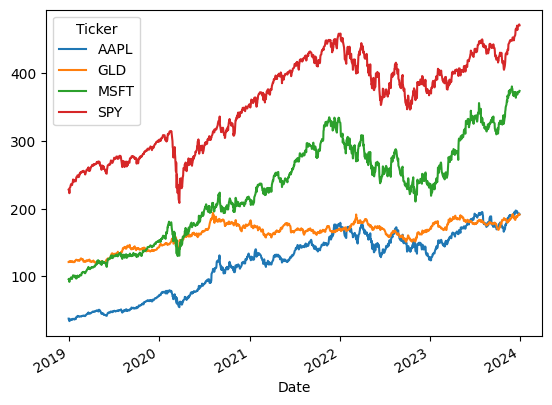

In [147]:
data.plot()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

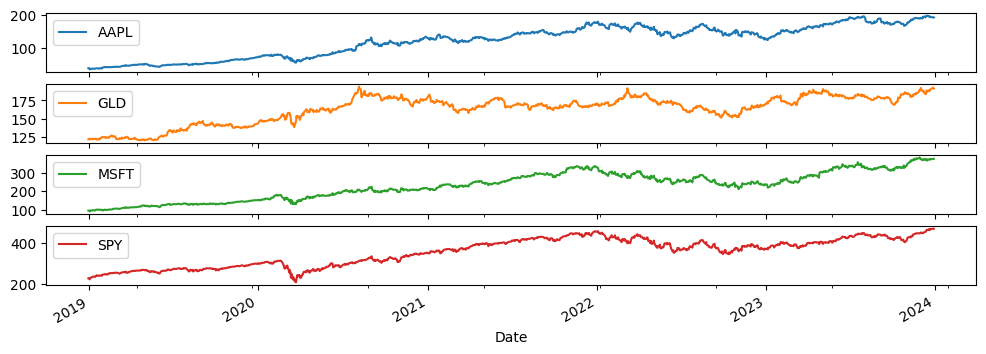

In [148]:
data.plot(figsize=(12, 4), subplots=True)

**Matplotlib** is a Python library used to create 2D graphs and data visualizations. It is highly customizable and allows generating line plots, bar charts, scatter plots, histograms, among others, with options to customize colors, styles, and labels.

You can find the documentation at [matplotlib](https://matplotlib.org/)


In our case, how can I plot these price series?

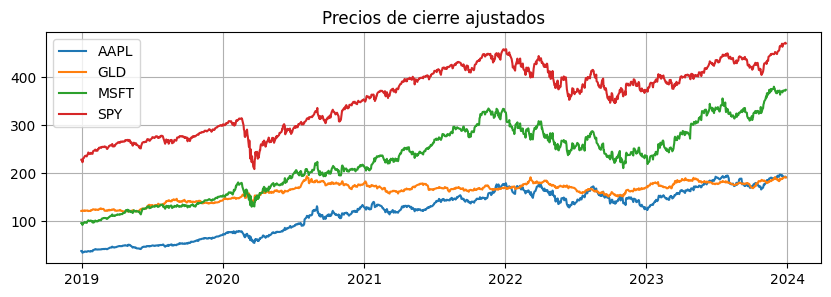

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(data["AAPL"], label="AAPL")
plt.plot(data["GLD"], label="GLD")
plt.plot(data["MSFT"], label="MSFT")
plt.plot(data["SPY"], label="SPY")
plt.title("Precios de cierre ajustados")
plt.grid(True)
plt.legend()
plt.show()

<div style="background-color: #e0f7fa; padding: 10px;">

## Review Exercise: Financial Data Analysis and Visualization

### Objectives:
1. Download financial data from Yahoo Finance.
2. Perform data inspection, cleaning, and concatenation.
3. Apply slicing techniques for analysis.
4. Visualize the data for preliminary analysis.

### Instructions:

#### 1. Data Download and Preparation:
- Use the `yfinance` library to download all prices (Open, High, Low, Close, Adj Close, Volume) for the following assets for the period from January 1, 2023, to August 31, 2023:
  - Tesla, Inc. (TSLA)
  - NVIDIA Corporation (NVDA)
  - Meta Platforms, Inc. (META)
- Rename the columns of each DataFrame using the format `Asset_Column` (e.g., `TSLA_Close`, `NVDA_Volume`, etc.).
- Merge all DataFrames into a single DataFrame called `df_concatenado`, using the date as the index.
- After concatenation, create a new DataFrame called `df_adj_close` containing only the adjusted close price (`Adj Close`) columns for each asset.

#### 2. Initial Inspection:
- Display the first 10 rows of the `df_adj_close` DataFrame to review its structure and content.
- Identify the columns containing null values and show the total number of null values per column.
- Use `info()` and `describe()` to get an overview of the data.

#### 3. Data Slicing:
- Select the rows corresponding to July 2023 and create a new table with the adjusted close prices (`Adj Close`) for that period for each asset.
- Create a table with the first 30 observations of 2023, including only the adjusted close price (`Adj Close`) columns.

#### 4. Data Visualization:
- Generate a line plot using Pandas visualization methods to show the evolution of adjusted close prices (`Adj Close`) for the three assets over the full period.
- Using `matplotlib`, create a customized chart to visualize the adjusted close prices (`Adj Close`) for the three assets, including title, legend, and grid.

#### 5. Interpretation:
- Discuss which of the analyzed assets you would invest your money in.

</div>


In [150]:
# Required Libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#### 1. Data Download and Preparation:
- Use the `yfinance` library to download all prices (Open, High, Low, Close, Adj Close, Volume) for the following assets for the period from January 1, 2023, to August 31, 2023:
  - Tesla, Inc. (TSLA)
  - NVIDIA Corporation (NVDA)
  - Meta Platforms, Inc. (META)
- Rename the columns of each DataFrame using the format `Asset_Column` (e.g., `TSLA_Close`, `NVDA_Volume`, etc.).
- Merge all DataFrames into a single DataFrame called `df_concatenado`, using the date as the index.
- After concatenation, create a new DataFrame called `df_adj_close` containing only the adjusted close price (`Adj Close`) columns for each asset.

In [151]:
# 1. Data Download and Preparation
tickers = ['TSLA', 'NVDA', 'META']
start_date = '2023-01-01'
end_date = '2023-08-31'

# Download the data for the given tickers
data = {}
for ticker in tickers:
    data[ticker] = yf.download(ticker, start=start_date, end=end_date)

# Rename columns using Asset_Column format
for ticker in tickers:
    data[ticker].columns = [f"{ticker}_{col}" for col in data[ticker].columns]

# Merge all DataFrames on the date index
df_concatenado = pd.concat([data['TSLA'], data['NVDA'], data['META']], axis=1)

# 1. Create a new DataFrame with only Adjusted Close columns
df_adj_close = df_concatenado[[f'{ticker}_Adj Close' for ticker in tickers]]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


#### 2. Initial Inspection:
- Display the first 10 rows of the `df_adj_close` DataFrame to review its structure and content.
- Identify the columns containing null values and show the total number of null values per column.
- Use `info()` and `describe()` to get an overview of the data.

In [152]:
df_adj_close.iloc[:10]

,TSLA_Adj Close,NVDA_Adj Close,META_Adj Close
Date,,,
2023-01-03,108.099998,14.305579,124.365547
2023-01-04,113.639999,14.739295,126.987663
2023-01-05,110.339996,14.255615,126.558945
2023-01-06,113.059998,14.849223,129.629700
2023-01-09,119.769997,15.617718,129.081360
2023-01-10,118.849998,15.898533,132.590790
2023-01-11,123.220001,15.990472,132.491074
2023-01-12,123.559998,16.500135,136.299622
2023-01-13,122.400002,16.887882,136.568802


In [153]:
df_adj_close.isnull().sum()

TSLA_Adj Close    0
NVDA_Adj Close    0
META_Adj Close    0
dtype: int64

In [154]:
df_adj_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 166 entries, 2023-01-03 to 2023-08-30
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TSLA_Adj Close  166 non-null    float64
 1   NVDA_Adj Close  166 non-null    float64
 2   META_Adj Close  166 non-null    float64
dtypes: float64(3)
memory usage: 5.2 KB


In [155]:
df_adj_close.describe()

,TSLA_Adj Close,NVDA_Adj Close,META_Adj Close
count,166.000000,166.000000,166.000000
mean,204.813192,31.834156,231.361108
std,44.729212,10.197624,57.012631
min,108.099998,14.255615,124.365547
25%,175.082497,23.330135,184.362404
50%,196.044998,28.073786,232.744240
75%,245.104996,42.394680,285.031769
max,293.339996,49.245037,324.502991


#### 3. Data Slicing:
- Select the rows corresponding to July 2023 and create a new table with the adjusted close prices (`Adj Close`) for that period for each asset.
- Create a table with the first 30 observations of 2023, including only the adjusted close price (`Adj Close`) columns.

In [156]:
# Rows for July 2023
df_july_2023 = df_adj_close['2023-07-01':'2023-07-31']
df_july_2023.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2023-07-03 to 2023-07-31
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TSLA_Adj Close  20 non-null     float64
 1   NVDA_Adj Close  20 non-null     float64
 2   META_Adj Close  20 non-null     float64
dtypes: float64(3)
memory usage: 640.0 bytes


In [157]:
# First 30 observations of 2023 with adjusted close price columns
df_first_30_obs = df_adj_close.head(30)
df_first_30_obs

,TSLA_Adj Close,NVDA_Adj Close,META_Adj Close
Date,,,
2023-01-03,108.099998,14.305579,124.365547
2023-01-04,113.639999,14.739295,126.987663
2023-01-05,110.339996,14.255615,126.558945
2023-01-06,113.059998,14.849223,129.629700
2023-01-09,119.769997,15.617718,129.081360
2023-01-10,118.849998,15.898533,132.590790
2023-01-11,123.220001,15.990472,132.491074
2023-01-12,123.559998,16.500135,136.299622
2023-01-13,122.400002,16.887882,136.568802


#### 4. Data Visualization:
- Generate a line plot using Pandas visualization methods to show the evolution of adjusted close prices (`Adj Close`) for the three assets over the full period.
- Using `matplotlib`, create a customized chart to visualize the adjusted close prices (`Adj Close`) for the three assets, including title, legend, and grid.

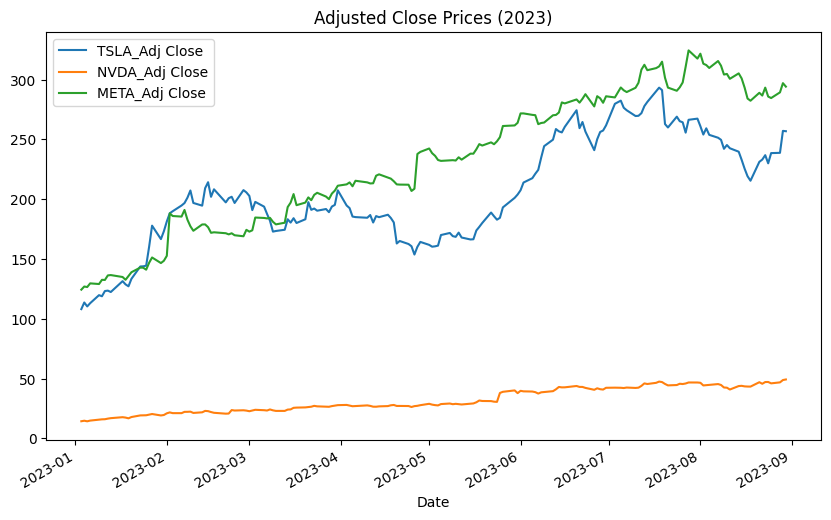

In [158]:
# Line plot for the adjusted close prices
df_adj_close.plot(title="Adjusted Close Prices (2023)", figsize=(10, 6))
plt.show()

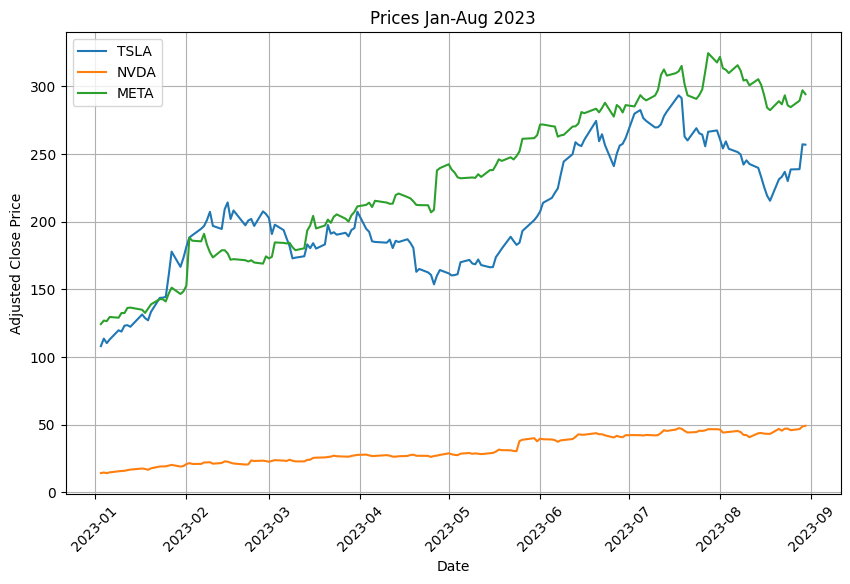

In [159]:
# Customized plot with rotated x-axis labels and updated title
plt.figure(figsize=(10, 6))
for ticker in tickers:
    plt.plot(df_adj_close.index, df_adj_close[f'{ticker}_Adj Close'], label=ticker)
plt.title("Prices Jan-Aug 2023")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend()
plt.grid(True)
plt.show()


#### 5. Interpretation:
- Discuss which of the analyzed assets you would invest your money in.

In [82]:
# Calculate the total return for each asset between the first and last day of the period
returns_total = 100 * (df_adj_close.iloc[-1] - df_adj_close.iloc[0]) / df_adj_close.iloc[0]

# Show the calculated total returns for each asset
returns_total



TSLA_Adj Close    137.650321
NVDA_Adj Close    244.236584
META_Adj Close    136.572089
dtype: float64